In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# טוענים את הדאטאסט
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data.astype(float)
y = boston.target.astype(float)

# פיצול
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [5]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
#LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict (X_test)

#XGBRegressor
xgb = XGBRegressor(random_state =42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [15]:
def print_score(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}\n RMSE: {rmse}\n R²: {r2}\n")

In [16]:
print_score("Linear Regression", y_test, lr_pred)
print_score("XGBoost Regressor", y_test,xgb_pred )


Linear Regression
 RMSE: 4.928602182665346
 R²: 0.6687594935356307

XGBoost Regressor
 RMSE: 2.62854171840299
 R²: 0.9057837838492537



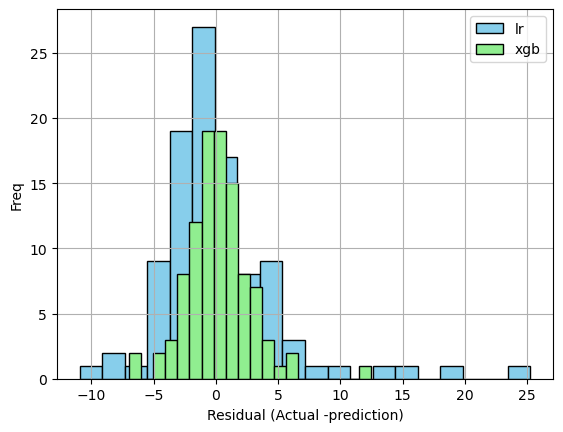

In [20]:
import matplotlib.pyplot as plt

lr_res = y_test- lr_pred
xbg_res = y_test - xgb_pred


plt.hist(lr_res, bins =20, color ='skyblue', edgecolor='black',  label ='lr')
plt.hist(xbg_res, bins =20, color  ='lightgreen', edgecolor='black',  label ='xgb')

plt.xlabel ("Residual (Actual -prediction)")
plt.ylabel ("Freq")
plt.legend()
plt.grid(True)
